## DDos Balanced

In [1]:
import numpy as np
import pandas as pd
import gc

### Overview data

#### Define the data types for each features

In [2]:
dtypes = {
    "Src IP": "category",
    "Src Port": "uint16",
    "Dst IP": "category",
    "Dst Port": "uint16",
    "Protocol": "category",
    "Flow Duration": "uint32",
    "Tot Fwd Pkts": "uint32",
    "Tot Bwd Pkts": "uint32",
    "TotLen Fwd Pkts": "float32",
    "TotLen Bwd Pkts": "float32",
    "Fwd Pkt Len Max": "float32",
    "Fwd Pkt Len Min": "float32",
    "Fwd Pkt Len Mean": "float32",
    "Fwd Pkt Len Std": "float32",
    "Bwd Pkt Len Max": "float32",
    "Bwd Pkt Len Min": "float32",
    "Bwd Pkt Len Mean": "float32",
    "Bwd Pkt Len Std": "float32",
    "Flow ID": "category",
    "Flow Byts/s": "float32",
    "Flow Pkts/s": "float32",
    "Flow IAT Mean": "float32",
    "Flow IAT Std": "float32",
    "Flow IAT Max": "float32",
    "Flow IAT Min": "float32",
    "Fwd IAT Tot": "float32",
    "Fwd IAT Mean": "float32",
    "Fwd IAT Std": "float32",
    "Fwd IAT Max": "float32",
    "Fwd IAT Min": "float32",
    "Bwd IAT Tot": "float32",
    "Bwd IAT Mean": "float32",
    "Bwd IAT Std": "float32",
    "Bwd IAT Max": "float32",
    "Bwd IAT Min": "float32",
    "Fwd PSH Flags": "category",
    "Bwd PSH Flags": "category",
    "Fwd URG Flags": "category",
    "Bwd URG Flags": "category",
    "Fwd Header Len": "uint32",
    "Bwd Header Len": "uint32",
    "Fwd Pkts/s": "float32",
    "Bwd Pkts/s": "float32",
    "Pkt Len Min": "float32",
    "Pkt Len Max": "float32",
    "Pkt Len Mean": "float32",
    "Pkt Len Std": "float32",
    "Pkt Len Var": "float32",
    "FIN Flag Cnt": "category",
    "SYN Flag Cnt": "category",
    "RST Flag Cnt": "category",
    "PSH Flag Cnt": "category",
    "ACK Flag Cnt": "category",
    "URG Flag Cnt": "category",
    "CWE Flag Count": "category",
    "ECE Flag Cnt": "category",
    "Down/Up Ratio": "float32",
    "Pkt Size Avg": "float32",
    "Fwd Seg Size Avg": "float32",
    "Bwd Seg Size Avg": "float32",
    "Fwd Byts/b Avg": "uint32",
    "Fwd Pkts/b Avg": "uint32",
    "Fwd Blk Rate Avg": "uint32",
    "Bwd Byts/b Avg": "uint32",
    "Bwd Pkts/b Avg": "uint32",
    "Bwd Blk Rate Avg": "uint32",
    "Subflow Fwd Pkts": "uint32",
    "Subflow Fwd Byts": "uint32",
    "Subflow Bwd Pkts": "uint32",
    "Subflow Bwd Byts": "uint32",
    "Init Fwd Win Byts": "uint32",
    "Init Bwd Win Byts": "uint32",
    "Fwd Act Data Pkts": "uint32",
    "Fwd Seg Size Min": "uint32",
    "Active Mean": "float32",
    "Active Std": "float32",
    "Active Max": "float32",
    "Active Min": "float32",
    "Idle Mean": "float32",
    "Idle Std": "float32",
    "Idle Max": "float32",
    "Idle Min": "float32",
    "Label": "category",
}

In [3]:
df = pd.read_csv(
    "../dataset/ddos_balanced/final_dataset.csv",
    dtype=dtypes,
    engine="c",
)

del dtypes


df.info()

gc.collect()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12794627 entries, 0 to 12794626
Data columns (total 85 columns):
 #   Column             Dtype   
---  ------             -----   
 0   Unnamed: 0         int64   
 1   Flow ID            category
 2   Src IP             category
 3   Src Port           uint16  
 4   Dst IP             category
 5   Dst Port           uint16  
 6   Protocol           category
 7   Timestamp          object  
 8   Flow Duration      uint32  
 9   Tot Fwd Pkts       uint32  
 10  Tot Bwd Pkts       uint32  
 11  TotLen Fwd Pkts    float32 
 12  TotLen Bwd Pkts    float32 
 13  Fwd Pkt Len Max    float32 
 14  Fwd Pkt Len Min    float32 
 15  Fwd Pkt Len Mean   float32 
 16  Fwd Pkt Len Std    float32 
 17  Bwd Pkt Len Max    float32 
 18  Bwd Pkt Len Min    float32 
 19  Bwd Pkt Len Mean   float32 
 20  Bwd Pkt Len Std    float32 
 21  Flow Byts/s        float32 
 22  Flow Pkts/s        float32 
 23  Flow IAT Mean      float32 
 24  Flow IAT Std       flo

0

#### Data shape

In [4]:
df.shape

(12794627, 85)

In [5]:
df.describe()

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Unnamed: 0,Src Port,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.279463e+07,1.279463e+07,1.279463e+07,1.279463e+07,1.279463e+07,1.279463e+07,1.279463e+07,1.279463e+07,1.279463e+07,1.279463e+07,...,1.279463e+07,1.279463e+07,1.279463e+07,1.279463e+07,1.279463e+07,1.279463e+07,12794627.0,1.279463e+07,12794627.0,12794627.0
mean,2.662390e+06,3.707054e+04,1.464290e+04,8.223957e+06,2.719636e+01,4.974281e+00,1.125727e+03,3.264957e+03,2.922581e+02,7.095572e+00,...,2.414145e+01,8.117674e+00,1.369698e+05,6.936345e+04,2.049868e+05,9.030539e+04,3119924.0,1.093532e+05,3215790.5,3019043.5
std,2.169382e+06,2.521985e+04,2.306383e+04,2.514728e+07,1.720577e+03,2.509204e+02,5.479157e+04,5.387678e+05,3.931046e+02,1.974606e+01,...,1.711587e+03,9.138129e+00,2.301480e+06,1.399946e+06,3.050190e+06,1.934856e+06,12192611.0,1.414693e+06,12444760.0,12065275.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
25%,8.984830e+05,4.430000e+02,8.000000e+01,1.262000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
50%,2.040991e+06,5.059200e+04,8.000000e+01,3.206600e+04,2.000000e+00,1.000000e+00,4.200000e+01,1.120000e+02,4.000000e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
75%,3.903946e+06,5.621500e+04,3.855000e+04,4.159749e+06,4.000000e+00,4.000000e+00,9.350000e+02,3.580000e+02,6.770000e+02,0.000000e+00,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
max,7.902474e+06,6.553500e+04,6.553500e+04,4.294967e+09,3.096280e+05,2.919230e+05,9.908096e+06,6.554527e+08,2.336000e+04,1.472000e+03,...,3.096280e+05,4.800000e+01,1.132691e+08,7.523242e+07,1.132691e+08,1.132691e+08,119999736.0,7.639395e+07,119999736.0,119999736.0


#### Data ussage for data frame

In [6]:
mb = df.memory_usage().sum() / 1024**2
print("Memory usage of dataframe is {:.2f} MB".format(mb))

gc.collect()

Memory usage of dataframe is 3853.44 MB


0

### Distribution 'Label' feture

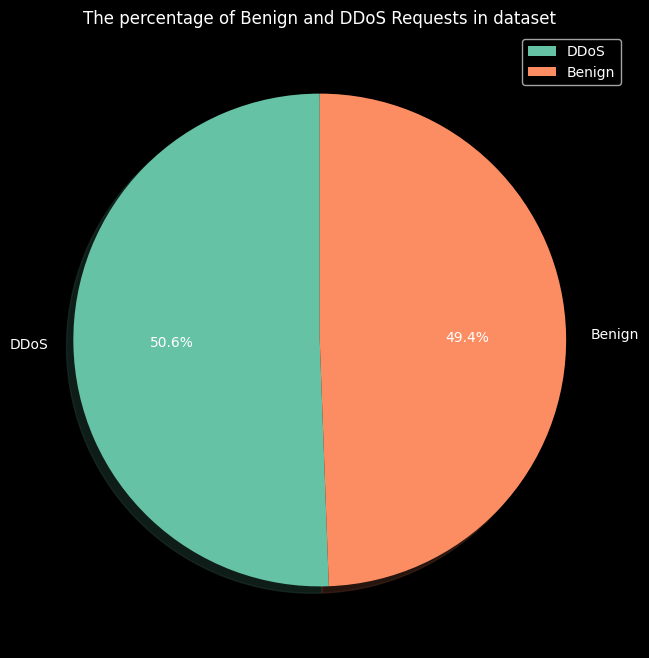

2439

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.theme = "light"

Label = ["DDoS", "Benign"]
sizes = [
    df["Label"].value_counts()["ddos"],
    df["Label"].value_counts()["Benign"],
]

plt.figure(figsize=(13, 8))
colors = sns.color_palette("Set2")
plt.pie(
    sizes, labels=Label, autopct="%1.1f%%", shadow=True, startangle=90, colors=colors
)
plt.legend(["DDoS", "Benign"])
plt.title("The percentage of Benign and DDoS Requests in dataset")
plt.show()

gc.collect()

## Data preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12794627 entries, 0 to 12794626
Data columns (total 85 columns):
 #   Column             Dtype   
---  ------             -----   
 0   Unnamed: 0         int64   
 1   Flow ID            category
 2   Src IP             category
 3   Src Port           uint16  
 4   Dst IP             category
 5   Dst Port           uint16  
 6   Protocol           category
 7   Timestamp          object  
 8   Flow Duration      uint32  
 9   Tot Fwd Pkts       uint32  
 10  Tot Bwd Pkts       uint32  
 11  TotLen Fwd Pkts    float32 
 12  TotLen Bwd Pkts    float32 
 13  Fwd Pkt Len Max    float32 
 14  Fwd Pkt Len Min    float32 
 15  Fwd Pkt Len Mean   float32 
 16  Fwd Pkt Len Std    float32 
 17  Bwd Pkt Len Max    float32 
 18  Bwd Pkt Len Min    float32 
 19  Bwd Pkt Len Mean   float32 
 20  Bwd Pkt Len Std    float32 
 21  Flow Byts/s        float32 
 22  Flow Pkts/s        float32 
 23  Flow IAT Mean      float32 
 24  Flow IAT Std       flo

#### Remove nullable value

In [9]:
# List nullable value
df.isnull().sum()

Unnamed: 0    0
Flow ID       0
Src IP        0
Src Port      0
Dst IP        0
             ..
Idle Mean     0
Idle Std      0
Idle Max      0
Idle Min      0
Label         0
Length: 85, dtype: int64

#### => 'Flow Byts/s' have nullable value

In [10]:
df.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,624,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:32 AM,3974862,29,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,625,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:36 AM,63,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,626,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:36 AM,476078,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,627,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:37 AM,151,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,628,192.168.4.118-203.73.24.75-4506-80-6,192.168.4.118,4506,203.73.24.75,80,6,12/06/2010 08:34:37 AM,472507,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


#### Remove columns have just ONE value

In [11]:
# Count columns have ONE value
nunique = df.apply(pd.Series.nunique)

unique_cols = nunique[nunique == 1].index

In [12]:
print(unique_cols)
gc.collect()

Index(['Fwd URG Flags', 'Bwd URG Flags', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg'],
      dtype='object')


0

#### Create 'colsToDrop' variable to push column need to drop

In [13]:
colsToDrop = np.array(unique_cols)

del unique_cols

gc.collect()

0

#### Drop categorical columns that have one category predominance

In [14]:
# counting unique values and checking for skewness in the data
rowbuilder = lambda col: {
    "col": col,
    "unique_values": df[col].nunique(),
    "most_frequent_value": df[col].value_counts().index[0],
    "frequency": df[col].value_counts(normalize=True).values[0],
}

frequency = [rowbuilder(col) for col in df.select_dtypes(include=["category"]).columns]
skewed = pd.DataFrame(frequency)
skewed = skewed[skewed["frequency"] >= 0.95]

colsToDrop = np.union1d(colsToDrop, skewed["col"].values)
colsToDrop

del skewed
del rowbuilder
del frequency

gc.collect()

0

#### Drop columns where missing values are more than 50% Drop rows where a column missing values are no more than 5%

In [15]:
missing = df.isna().sum()
missing = pd.DataFrame(
    {"count": missing, "% of total": missing / len(df) * 100}, index=df.columns
)

print('Missing values: ', missing[missing["% of total"] > 0])

colsToDrop = np.union1d(colsToDrop, missing[missing["% of total"] >= 50].index.values)

print('Columns to drop: ', colsToDrop)

dropnaCols = missing[
    (missing["% of total"] > 0) & (missing["% of total"] <= 5)
].index.values

print('Columns to dropna: ', dropnaCols)

Missing values:               count  % of total
Flow Byts/s  29713     0.23223
Columns to drop:  ['Bwd Blk Rate Avg' 'Bwd Byts/b Avg' 'Bwd PSH Flags' 'Bwd Pkts/b Avg'
 'Bwd URG Flags' 'FIN Flag Cnt' 'Fwd Blk Rate Avg' 'Fwd Byts/b Avg'
 'Fwd PSH Flags' 'Fwd Pkts/b Avg' 'Fwd URG Flags' 'URG Flag Cnt']
Columns to dropna:  ['Flow Byts/s']


##### Flow Byts/s have so much NaN value, and we see that the Flow Pkts/s can have some NaN value, because they can divide by 0

#### Handling faulty data by replacing it with the infinite value

In [16]:
# Handling faulty data by replacing it with the infinite value

df["Flow Byts/s"] = df["Flow Byts/s"].replace(np.inf, np.nan)
df["Flow Pkts/s"] = df["Flow Pkts/s"].replace(np.inf, np.nan)
dropnaCols = np.union1d(dropnaCols, ["Flow Byts/s", "Flow Pkts/s"])

gc.collect()

0

##### Print columns need to drop and subset columns with NaN value

In [17]:
print('Columns to drop: ', colsToDrop)
print('Columns to dropna: ', dropnaCols)

Columns to drop:  ['Bwd Blk Rate Avg' 'Bwd Byts/b Avg' 'Bwd PSH Flags' 'Bwd Pkts/b Avg'
 'Bwd URG Flags' 'FIN Flag Cnt' 'Fwd Blk Rate Avg' 'Fwd Byts/b Avg'
 'Fwd PSH Flags' 'Fwd Pkts/b Avg' 'Fwd URG Flags' 'URG Flag Cnt']
Columns to dropna:  ['Flow Byts/s' 'Flow Pkts/s']


#### Perform actual drop

In [18]:
df.drop(columns=colsToDrop, axis=1, inplace=True)
df.dropna(subset=dropnaCols, inplace=True)

del colsToDrop
del dropnaCols

gc.collect()

0

#### Drop the negative value

In [19]:
negValCols = [
    "Flow Pkts/s",
    "Flow IAT Mean",
    "Flow IAT Max",
    "Flow IAT Min",
    "Bwd IAT Tot",
    "Bwd IAT Mean",
    "Bwd IAT Max",
    "Bwd IAT Min",
]

for col in negValCols:
    df = df[df[col] >= 0]

#### Check dataset again

In [20]:
gc.collect()

0

In [21]:
df.shape

(12746440, 73)

In [22]:
df.isnull().sum()

Unnamed: 0    0
Flow ID       0
Src IP        0
Src Port      0
Dst IP        0
             ..
Idle Mean     0
Idle Std      0
Idle Max      0
Idle Min      0
Label         0
Length: 73, dtype: int64

In [23]:
df.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,624,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:32 AM,3974862,29,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,625,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:36 AM,63,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,626,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:36 AM,476078,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,627,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:37 AM,151,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,628,192.168.4.118-203.73.24.75-4506-80-6,192.168.4.118,4506,203.73.24.75,80,6,12/06/2010 08:34:37 AM,472507,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [24]:
df.describe(include="all")

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,1.274644e+07,12746440,12746440,1.274644e+07,12746440,1.274644e+07,12746440,12746440,1.274644e+07,1.274644e+07,...,1.274644e+07,1.274644e+07,1.274644e+07,1.274644e+07,1.274644e+07,12746440.0,1.274644e+07,12746440.0,12746440.0,12746440
unique,NaN,4832736,36602,NaN,34320,NaN,3,85963,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,8.0.6.4-8.6.0.1-0-0-0,172.31.69.25,NaN,172.31.69.25,NaN,6,16/02/2018 11:15:28 PM,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ddos
freq,NaN,75213,1767182,NaN,2485191,NaN,10440981,8403,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6472617
mean,2.657451e+06,NaN,NaN,3.720421e+04,NaN,1.450681e+04,NaN,NaN,8.249082e+06,2.713027e+01,...,8.074001e+00,1.374450e+05,6.961098e+04,2.056971e+05,9.061242e+04,3131266.0,1.097409e+05,3227475.5,3030029.0,NaN
std,2.168988e+06,NaN,NaN,2.516860e+04,NaN,2.299506e+04,NaN,NaN,2.481229e+07,1.715307e+03,...,9.126341e+00,2.305507e+06,1.402556e+06,3.055658e+06,1.938153e+06,12213409.0,1.417103e+06,12465935.0,12085933.0,NaN
min,0.000000e+00,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,NaN
25%,8.951120e+05,NaN,NaN,4.430000e+02,NaN,8.000000e+01,NaN,NaN,1.280000e+03,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,NaN
50%,2.035386e+06,NaN,NaN,5.062200e+04,NaN,8.000000e+01,NaN,NaN,3.276800e+04,2.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,NaN
75%,3.887593e+06,NaN,NaN,5.624600e+04,NaN,3.799400e+04,NaN,NaN,4.167191e+06,4.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12746440 entries, 0 to 12794626
Data columns (total 73 columns):
 #   Column             Dtype   
---  ------             -----   
 0   Unnamed: 0         int64   
 1   Flow ID            category
 2   Src IP             category
 3   Src Port           uint16  
 4   Dst IP             category
 5   Dst Port           uint16  
 6   Protocol           category
 7   Timestamp          object  
 8   Flow Duration      uint32  
 9   Tot Fwd Pkts       uint32  
 10  Tot Bwd Pkts       uint32  
 11  TotLen Fwd Pkts    float32 
 12  TotLen Bwd Pkts    float32 
 13  Fwd Pkt Len Max    float32 
 14  Fwd Pkt Len Min    float32 
 15  Fwd Pkt Len Mean   float32 
 16  Fwd Pkt Len Std    float32 
 17  Bwd Pkt Len Max    float32 
 18  Bwd Pkt Len Min    float32 
 19  Bwd Pkt Len Mean   float32 
 20  Bwd Pkt Len Std    float32 
 21  Flow Byts/s        float32 
 22  Flow Pkts/s        float32 
 23  Flow IAT Mean      float32 
 24  Flow IAT Std       float32 

### Take important feature (based on Kaggle)

In [26]:
df_final = df[
    [
        "Flow ID",
        "Timestamp",
        "Fwd Seg Size Min",
        "Src IP",
        "Dst IP",
        "Flow IAT Min",
        "Src Port",
        "Dst Port",
        "Tot Fwd Pkts",
        "Init Bwd Win Byts",
    ]
]

del df

gc.collect()

0

In [27]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12746440 entries, 0 to 12794626
Data columns (total 10 columns):
 #   Column             Dtype   
---  ------             -----   
 0   Flow ID            category
 1   Timestamp          object  
 2   Fwd Seg Size Min   uint32  
 3   Src IP             category
 4   Dst IP             category
 5   Flow IAT Min       float32 
 6   Src Port           uint16  
 7   Dst Port           uint16  
 8   Tot Fwd Pkts       uint32  
 9   Init Bwd Win Byts  uint32  
dtypes: category(3), float32(1), object(1), uint16(2), uint32(3)
memory usage: 751.9+ MB


In [ ]:
# Convert timestamp
df_final["Timestamp"] = pd.to_datetime(df_final["Timestamp"], infer_datetime_format=True, dayfirst=True, errors='coerce')

df_final.info()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19228\1528781077.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_final["Timestamp"] = pd.to_datetime(df_final["Timestamp"], infer_datetime_format=True, dayfirst=True, errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Index: 12746440 entries, 0 to 12794626
Data columns (total 10 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Flow ID            category      
 1   Timestamp          datetime64[ns]
 2   Fwd Seg Size Min   uint32        
 3   Src IP             category      
 4   Dst IP             category      
 5   Flow IAT Min       float32       
 6   Src Port           uint16        
 7   Dst Port           uint16        
 8   Tot Fwd Pkts       uint32        
 9   Init Bwd Win Byts  uint32        
dtypes: category(3), datetime64[ns](1), float32(1), uint16(2), uint32(3)
memory usage: 751.9 MB


In [34]:
df_final = df_final.astype({"Flow ID": "string", "Src IP": "string", "Dst IP": "string"})

In [35]:
df_final.head()

,Flow ID,Timestamp,Fwd Seg Size Min,Src IP,Dst IP,Flow IAT Min,Src Port,Dst Port,Tot Fwd Pkts,Init Bwd Win Byts
0,192.168.4.118-203.73.24.75-4504-80-6,2010-06-12 08:34:32,0,192.168.4.118,203.73.24.75,167.0,4504,80,29,5840
1,192.168.4.118-203.73.24.75-4504-80-6,2010-06-12 08:34:36,0,192.168.4.118,203.73.24.75,63.0,4504,80,1,17520
2,192.168.4.118-203.73.24.75-4505-80-6,2010-06-12 08:34:36,0,192.168.4.118,203.73.24.75,6.0,4505,80,2,5840
3,192.168.4.118-203.73.24.75-4505-80-6,2010-06-12 08:34:37,0,192.168.4.118,203.73.24.75,6.0,4505,80,2,17520
4,192.168.4.118-203.73.24.75-4506-80-6,2010-06-12 08:34:37,0,192.168.4.118,203.73.24.75,7.0,4506,80,2,5840


In [36]:
df_final.describe(include="all")

,Flow ID,Timestamp,Fwd Seg Size Min,Src IP,Dst IP,Flow IAT Min,Src Port,Dst Port,Tot Fwd Pkts,Init Bwd Win Byts
count,12746440,6319594,1.274644e+07,12746440,12746440,12746440.0,1.274644e+07,1.274644e+07,1.274644e+07,1.274644e+07
unique,4832736,NaN,NaN,36602,34320,NaN,NaN,NaN,NaN,NaN
top,8.0.6.4-8.6.0.1-0-0-0,NaN,NaN,172.31.69.25,172.31.69.25,NaN,NaN,NaN,NaN,NaN
freq,75213,NaN,NaN,1767182,2485191,NaN,NaN,NaN,NaN,NaN
mean,NaN,2018-01-10 15:29:31.625308160,8.074001e+00,NaN,NaN,1455535.0,3.720421e+04,1.450681e+04,2.713027e+01,1.200080e+09
min,NaN,2010-06-12 08:34:32,0.000000e+00,NaN,NaN,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,2018-02-16 23:18:48,0.000000e+00,NaN,NaN,5.0,4.430000e+02,8.000000e+01,1.000000e+00,2.190000e+02
50%,NaN,2018-02-16 23:24:37,0.000000e+00,NaN,NaN,48.0,5.062200e+04,8.000000e+01,2.000000e+00,3.273800e+04
75%,NaN,2018-02-21 23:53:24,2.000000e+01,NaN,NaN,1991.0,5.624600e+04,3.799400e+04,4.000000e+00,4.294967e+09
max,NaN,2018-02-22 00:35:54,4.800000e+01,NaN,NaN,119999328.0,6.553500e+04,6.553500e+04,3.096280e+05,4.294967e+09


In [38]:
df_final.shape

(12746440, 10)

## Export to csv file

In [39]:
# Export to csv file
df_final.to_csv("../final_dataset/final_balanced.csv", index=False)

In [ ]:
# Export to csv file
df_final.to_csv("../final_dataset/final_balanced.csv", index=False)